In [304]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

In [305]:
data=pd.read_csv('voice.csv')
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [306]:
X = data.iloc[:,:-1]
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [307]:
y = data.iloc[:,-1]
gender_encoder = LabelEncoder()
y = gender_encoder.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

In [308]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [310]:
ann = tf.keras.models.Sequential()

In [311]:
ann.add(tf.keras.layers.Dense(units=16,kernel_initializer='uniform',activation="relu"))
ann.add(tf.keras.layers.Dense(units=16,kernel_initializer='uniform',activation="relu"))

In [312]:
ann.add(tf.keras.layers.Dense(units=1,kernel_initializer='uniform',activation="sigmoid"))

In [313]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [314]:
history = ann.fit(X_train, y_train, batch_size = 57, epochs = 50,verbose=1,validation_split=0.2 )

Epoch 1/50
40/40 [==============================] - 0s 4ms/step - loss: 0.6853 - accuracy: 0.7737 - val_loss: 0.6647 - val_accuracy: 0.8246
Epoch 2/50
40/40 [==============================] - 0s 2ms/step - loss: 0.6000 - accuracy: 0.8395 - val_loss: 0.5063 - val_accuracy: 0.8579
Epoch 3/50
40/40 [==============================] - 0s 2ms/step - loss: 0.4232 - accuracy: 0.8750 - val_loss: 0.3490 - val_accuracy: 0.8877
Epoch 4/50
40/40 [==============================] - 0s 1ms/step - loss: 0.3023 - accuracy: 0.8939 - val_loss: 0.2496 - val_accuracy: 0.9035
Epoch 5/50
40/40 [==============================] - 0s 1ms/step - loss: 0.2192 - accuracy: 0.9132 - val_loss: 0.1847 - val_accuracy: 0.9193
Epoch 6/50
40/40 [==============================] - 0s 1ms/step - loss: 0.1628 - accuracy: 0.9425 - val_loss: 0.1439 - val_accuracy: 0.9596
Epoch 7/50
40/40 [==============================] - 0s 1ms/step - loss: 0.1278 - accuracy: 0.9645 - val_loss: 0.1148 - val_accuracy: 0.9702
Epoch 8/50
40/40 [==

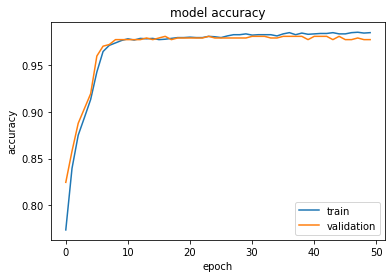

In [315]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='lower right')
plt.show()

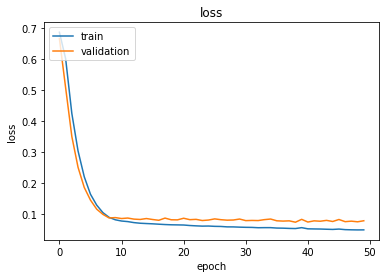

In [316]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [317]:
y_pred = ann.predict(X_test)
y_pred = [1 if y > 0.5 else 0 for y in y_pred]

In [318]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix", confusion_matrix)
print("Accuracy Score", accuracy_score(y_test, y_pred))

Confusion Matrix [[147   3]
 [  4 163]]
Accuracy Score 0.9779179810725552


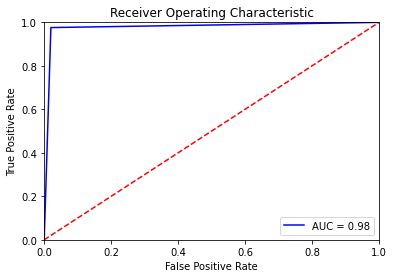

In [319]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()